<a href="https://colab.research.google.com/github/ahmer-talal/Neural-Networks/blob/main/Regression_PyTorch_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### **Loading Built-In Dataset:** California Housing

In [54]:
# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (20640, 8)
Target shape: (20640,)


## **Data Preprocessing** (Train-Test Spliting & Scaling)

In [61]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features & target
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


## **Building PyTorch Model**

In [62]:
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Initialize model
model = HousePriceModel(input_dim=X_train.shape[1])


## **Loss & Optimizer**

In [63]:
criterion = nn.MSELoss()          # Regression loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


## **Training Loop**: with mini batching & early stopping

In [64]:
epochs = 300
train_losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()        # Clear previous gradients
    outputs = model(X_train)     # Forward pass
    loss = criterion(outputs, y_train)
    loss.backward()              # Backward pass
    optimizer.step()             # Update weights

    train_losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/300], Loss: 0.4802
Epoch [20/300], Loss: 0.3639
Epoch [30/300], Loss: 0.3358
Epoch [40/300], Loss: 0.3081
Epoch [50/300], Loss: 0.2900
Epoch [60/300], Loss: 0.2734
Epoch [70/300], Loss: 0.2594
Epoch [80/300], Loss: 0.2504
Epoch [90/300], Loss: 0.2393
Epoch [100/300], Loss: 0.2308
Epoch [110/300], Loss: 0.2226
Epoch [120/300], Loss: 0.2209
Epoch [130/300], Loss: 0.2150
Epoch [140/300], Loss: 0.2099
Epoch [150/300], Loss: 0.2058
Epoch [160/300], Loss: 0.2021
Epoch [170/300], Loss: 0.1989
Epoch [180/300], Loss: 0.2070
Epoch [190/300], Loss: 0.1987
Epoch [200/300], Loss: 0.1938
Epoch [210/300], Loss: 0.1904
Epoch [220/300], Loss: 0.1884
Epoch [230/300], Loss: 0.1863
Epoch [240/300], Loss: 0.1842
Epoch [250/300], Loss: 0.1826
Epoch [260/300], Loss: 0.1812
Epoch [270/300], Loss: 0.1799
Epoch [280/300], Loss: 0.1783
Epoch [290/300], Loss: 0.1770
Epoch [300/300], Loss: 0.1759


## **Evaluation & Visualization**

Test Loss: 0.2053


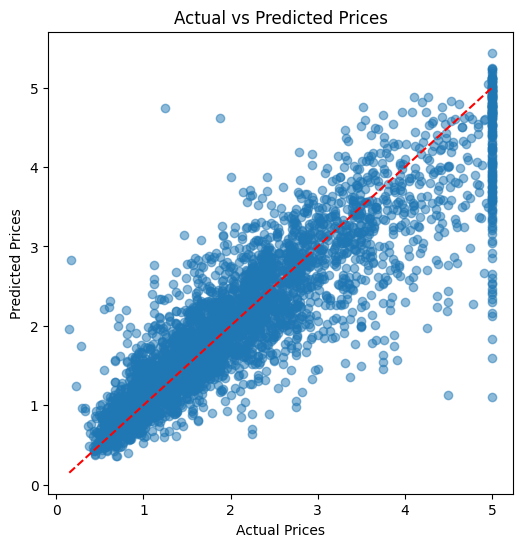

In [65]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

# Visualize predictions vs actual
pred = scaler_y.inverse_transform(predictions.detach().numpy())
actual = scaler_y.inverse_transform(y_test.detach().numpy())

plt.figure(figsize=(6,6))
plt.scatter(actual, pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.show()


## **Save & Load Model**

In [67]:
# Save
torch.save(model.state_dict(), "house_price_model.pth")

# Load
model_loaded = HousePriceModel(input_dim=X_train.shape[1])
model_loaded.load_state_dict(torch.load("house_price_model.pth"))
model_loaded.eval()


HousePriceModel(
  (fc1): Linear(in_features=8, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
)